In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
# Importing libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To display all columns at once
pd.set_option("display.max_columns", None)

In [9]:
# Importing Data Set
df = pd.read_csv(r'C:\Users\pranj\OneDrive - University of Exeter\BEMM457 - Topics in Business Analytics\price_paid_records.csv')

In [10]:
# Randomly selecting 100 thousand rows as data is too big
df_s = df.sample(n = 100000, random_state = 108)

In [11]:
# Taking a look at the data
df_s.head()

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only
7783052,{05174041-D9C9-4589-8DC8-54391C2B0DE8},114000,2002-04-08 00:00,S,N,F,EXETER,EXETER,DEVON,A,A
6507038,{B0C042EA-A3ED-4D08-9839-238626A54780},76000,2001-04-09 00:00,S,N,L,BOLTON,BOLTON,GREATER MANCHESTER,A,A
13016861,{699EC06C-4140-47A0-89B9-4E638BDB6F64},124950,2006-11-08 00:00,S,N,F,BLACKPOOL,BLACKPOOL,BLACKPOOL,A,A
18584945,{20FC5634-C854-43CC-9A27-88326B9A2F61},73500,2013-10-23 00:00,T,N,F,SOWERBY BRIDGE,CALDERDALE,WEST YORKSHIRE,A,A
12853901,{9D057686-B984-4737-B1AC-1E8B6889A6BD},28500,2006-08-21 00:00,F,Y,L,CHESTERFIELD,CHESTERFIELD,DERBYSHIRE,A,A


In [12]:
# Summary of the data
df_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 7783052 to 3241141
Data columns (total 11 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Transaction unique identifier      100000 non-null  object
 1   Price                              100000 non-null  int64 
 2   Date of Transfer                   100000 non-null  object
 3   Property Type                      100000 non-null  object
 4   Old/New                            100000 non-null  object
 5   Duration                           100000 non-null  object
 6   Town/City                          100000 non-null  object
 7   District                           100000 non-null  object
 8   County                             100000 non-null  object
 9   PPDCategory Type                   100000 non-null  object
 10  Record Status - monthly file only  100000 non-null  object
dtypes: int64(1), object(10)
memory usage: 9.2+ MB

C:\Users\pranj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


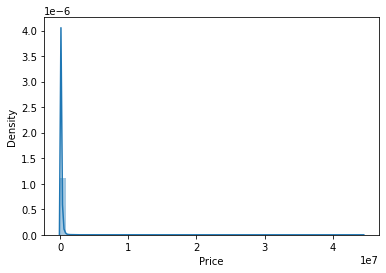

In [13]:
sns.distplot(df_s["Price"]);

In [14]:
# Rows with Prices more than 100000
df_s[df_s["Price"] > 100000].shape

(62356, 11)

C:\Users\pranj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


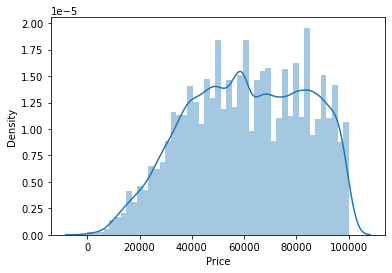

In [15]:
# Distribution of Price under 100 thousand
sns.distplot(df_s[df_s["Price"] < 100000]["Price"]);

In [16]:
# Creating new column as Price_bin
bins = [0, 100000, 200000, 300000, 400000, 500000]
labels = [100000, 200000, 300000, 400000, 500000]
df_s["Price_bin"] = pd.cut(df_s["Price"], bins = bins, labels = labels)

C:\Users\pranj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


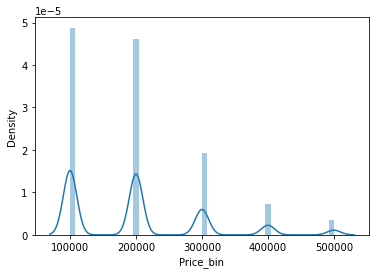

In [17]:
# Distribution with binning of Price column
sns.distplot(df_s["Price_bin"]);

In [18]:
# Aggregating prices based on date
df_daily=df_s.groupby("Date of Transfer").agg(["mean"]).reset_index()

In [19]:
# Extracting year
df_daily["Year"] = pd.DatetimeIndex(df_daily["Date of Transfer"]).year

# Aggregating based on year
df_yearly=df_daily.groupby("Year").agg(["mean"]).reset_index()

C:\Users\pranj\anaconda3\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [20]:
# Renaming the columns
df_yearly.columns = ["Year", "Avg_Price"]
df_yearly.head()

,Year,Avg_Price
0,1995,70315.339915
1,1996,72263.609250
2,1997,81330.717487
3,1998,86989.710039
4,1999,99156.897724


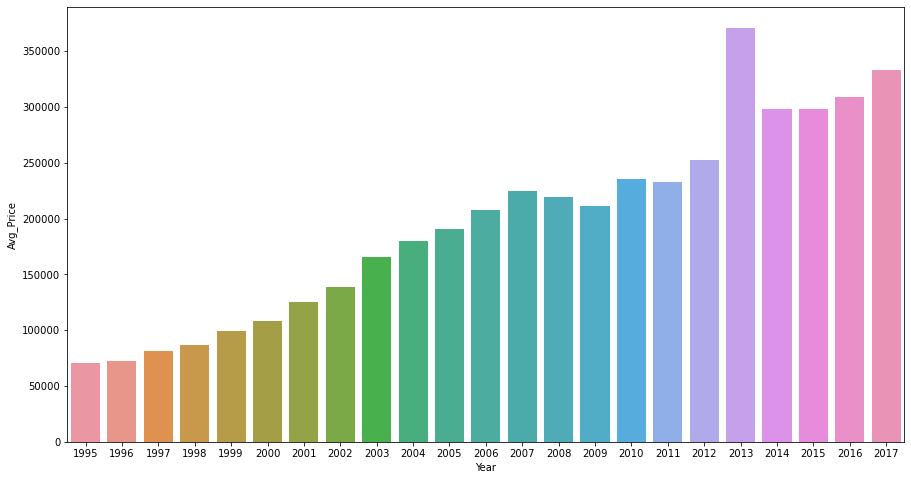

In [21]:
# Yearly Average Price
plt.figure(figsize=(15,8))
ax = sns.barplot(data = df_yearly, x = "Year", y = "Avg_Price")

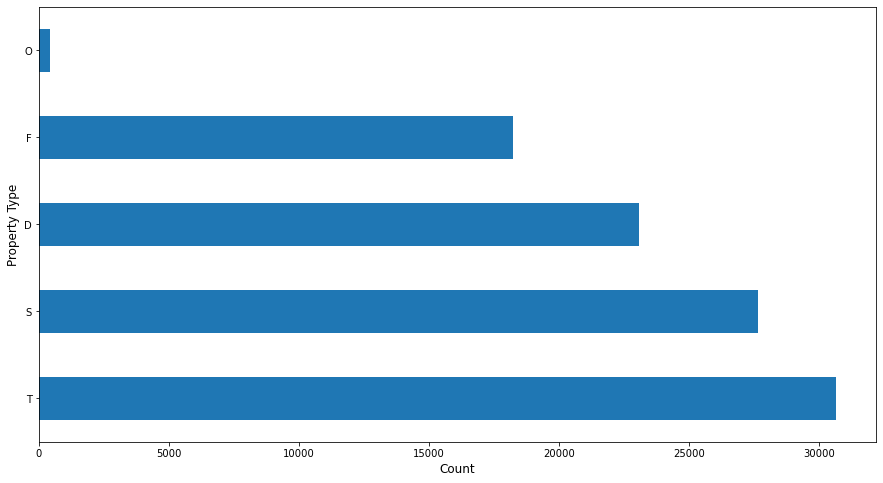

In [22]:
# Visualizing Property Type
plt.figure(figsize=(15,8))
ax = df_s["Property Type"].value_counts().plot.barh()
ax.set_xlabel("Count", fontsize = 12)
ax.set_ylabel("Property Type", fontsize = 12)
plt.show()

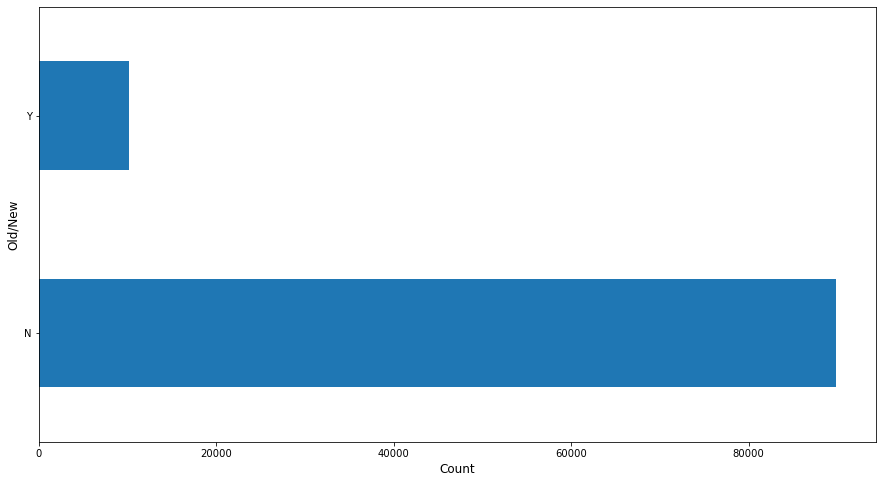

In [23]:
# Visualizing Old/New
plt.figure(figsize=(15,8))
ax = df_s["Old/New"].value_counts().plot.barh()
ax.set_xlabel("Count", fontsize = 12)
ax.set_ylabel("Old/New", fontsize = 12)
plt.show()

<Figure size 1080x576 with 0 Axes>

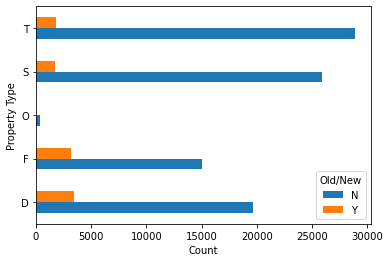

In [24]:
# Visualizing Property Type Vs Old/New
plt.figure(figsize=(15,8))
ax = pd.crosstab(df_s["Property Type"], df_s["Old/New"]).plot.barh()
ax.set_xlabel("Count")
plt.show;

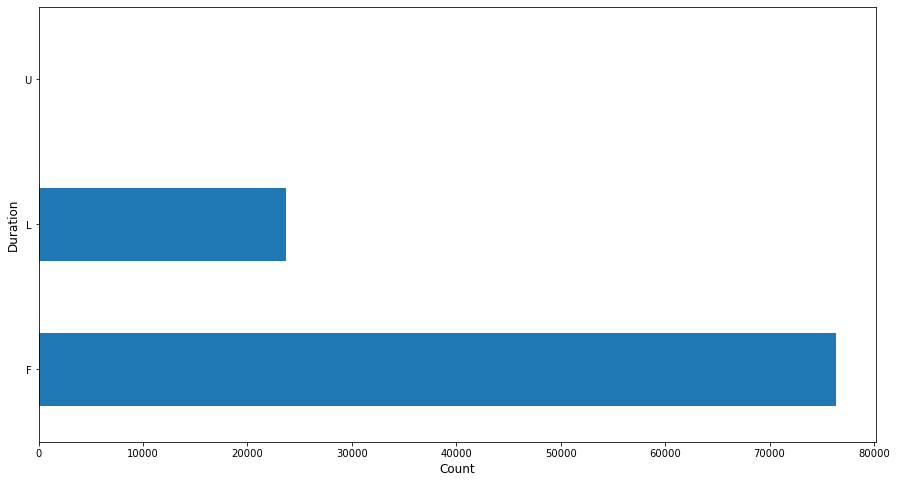

In [25]:
# Visualizing Duration
plt.figure(figsize=(15,8))
ax = df_s["Duration"].value_counts().plot.barh()
ax.set_xlabel("Count", fontsize = 12)
ax.set_ylabel("Duration", fontsize = 12)
plt.show()

In [26]:
# Duration value counts.
df_s["Duration"].value_counts()

F    76331
L    23665
U        4
Name: Duration, dtype: int64

<Figure size 1440x720 with 0 Axes>

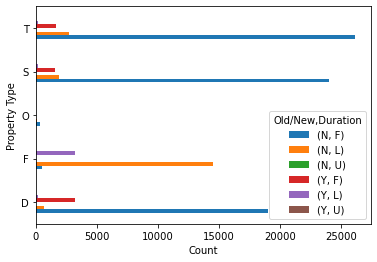

In [27]:
# Visualizing Property Type Vs Old/New and Duration
plt.figure(figsize=(20,10))
ax = pd.crosstab(df_s["Property Type"], [df_s["Old/New"], df_s["Duration"]]).plot.barh()
ax.set_xlabel("Count")
plt.show()

In [28]:
# Value counts for all the unique Towns and Cities
df_s["Town/City"].value_counts()

LONDON                  8027
MANCHESTER              1670
BIRMINGHAM              1475
BRISTOL                 1464
NOTTINGHAM              1350
                        ... 
BROUGHTON-IN-FURNESS       1
MINDRUM                    1
LYDBROOK                   1
PENYSARN                   1
MEIFOD                     1
Name: Town/City, Length: 1140, dtype: int64

In [29]:
# Creating a data frame to select top 10 cities
df_city = df_s["Town/City"].value_counts().head(10)
df_city = pd.DataFrame(df_city).reset_index()

In [30]:
# Assigning names to the Columns
df_city.columns = ["Name", "Count"]
df_city.head()

,Name,Count
0,LONDON,8027
1,MANCHESTER,1670
2,BIRMINGHAM,1475
3,BRISTOL,1464
4,NOTTINGHAM,1350


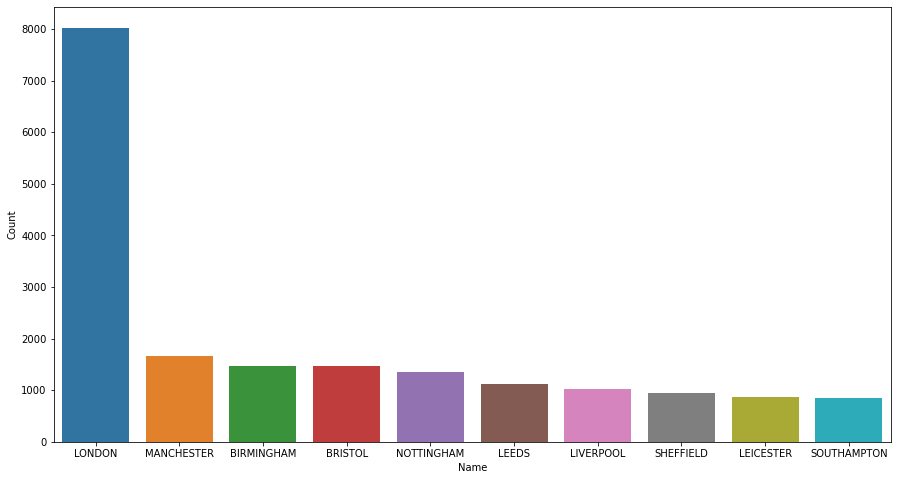

In [31]:
# Plotting the top 10 cities based on the number of properties sold
plt.figure(figsize=(15,8))
ax = sns.barplot(data = df_city, x = "Name", y = "Count")

In [32]:
# Creating a data frame to select bottom 10 towns/cities
df_city_b = df_s["Town/City"].value_counts().tail(10)
df_city_b = pd.DataFrame(df_city_b).reset_index()

In [33]:
df_city_b.head()

,index,Town/City
0,LLANDINAM,1
1,TREGARON,1
2,LLANFECHAIN,1
3,LLANFYRNACH,1
4,DOLWYDDELAN,1


In [34]:
# Assigning names to the Columns
df_city_b.columns = ["Name", "Count"]
df_city_b.head()

,Name,Count
0,LLANDINAM,1
1,TREGARON,1
2,LLANFECHAIN,1
3,LLANFYRNACH,1
4,DOLWYDDELAN,1


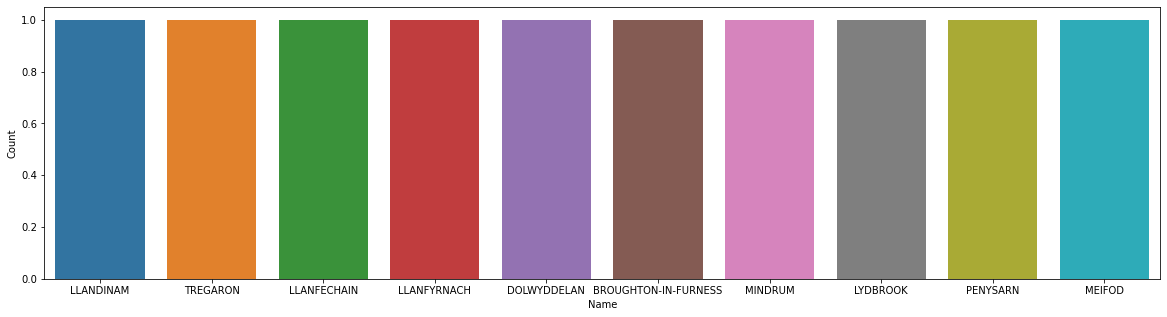

In [35]:
# Plotting the bottom 10 cities based on the number of properties sold
plt.figure(figsize=(20,5))
ax = sns.barplot(data = df_city_b, x = "Name", y = "Count")

In [36]:
df_s["District"].value_counts()

BIRMINGHAM             1462
LEEDS                  1322
BRADFORD                859
MANCHESTER              836
SHEFFIELD               811
                       ... 
DINEFWR                   1
RHUDDLAN                  1
SCUNTHORPE                1
HOLDERNESS                1
SOUTH PEMBROKESHIRE       1
Name: District, Length: 445, dtype: int64

In [37]:
# Creating a data frame to select top 10 districts
df_district = df_s["District"].value_counts().head(10)
df_district = pd.DataFrame(df_district).reset_index()

In [38]:
# Assigning names to the Columns
df_district.columns = ["Name", "Count"]
df_district.head()

,Name,Count
0,BIRMINGHAM,1462
1,LEEDS,1322
2,BRADFORD,859
3,MANCHESTER,836
4,SHEFFIELD,811


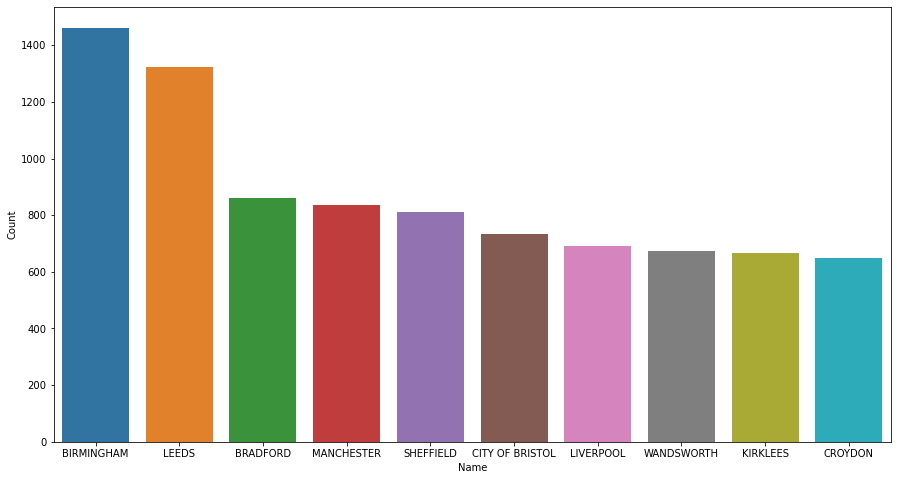

In [39]:
# Plotting the top 10 districts based on the number of properties sold
plt.figure(figsize=(15,8))
ax = sns.barplot(data = df_district, x = "Name", y = "Count")

In [40]:
df_s["County"].value_counts()

GREATER LONDON        13461
GREATER MANCHESTER     4439
WEST MIDLANDS          3787
WEST YORKSHIRE         3754
ESSEX                  2851
                      ...  
DYFED                    11
CLEVELAND                10
GWENT                     8
WEST GLAMORGAN            5
ISLES OF SCILLY           3
Name: County, Length: 127, dtype: int64

In [41]:
# Creating a data frame to select top 10 counties
df_county = df_s["County"].value_counts().head(10)
df_county = pd.DataFrame(df_county).reset_index()

In [42]:
# Assigning names to the Columns
df_county.columns = ["Name", "Count"]
df_county.head()

,Name,Count
0,GREATER LONDON,13461
1,GREATER MANCHESTER,4439
2,WEST MIDLANDS,3787
3,WEST YORKSHIRE,3754
4,ESSEX,2851


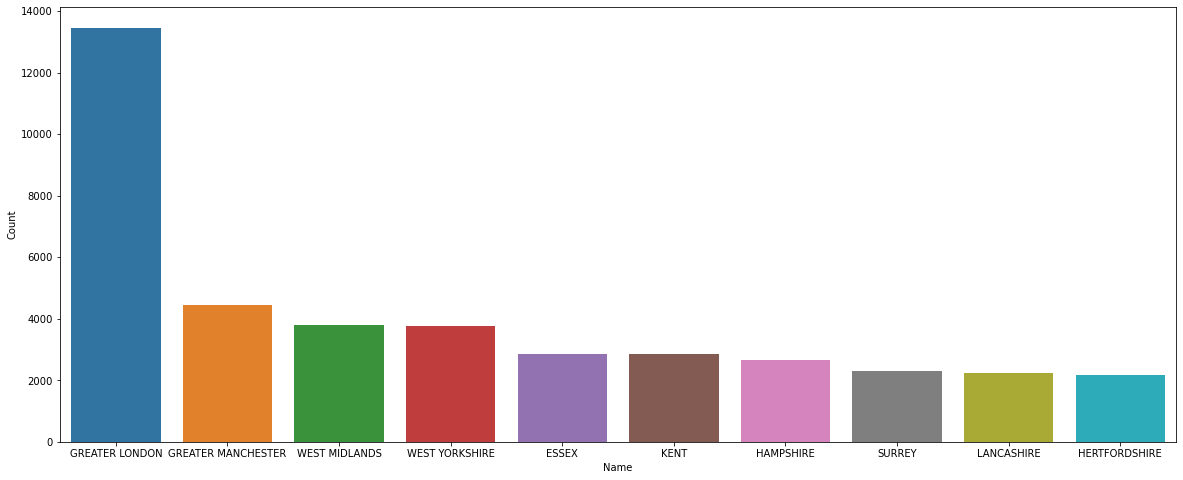

In [43]:
# Plotting the top 10 counties based on the number of properties sold
plt.figure(figsize=(20,8))
ax = sns.barplot(data = df_county, x = "Name", y = "Count")

In [44]:
df_s[df_s["Town/City"] == "LONDON"]

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only,Price_bin
19155305,{4FE588BA-9028-4448-8CF6-9BAFC381D56A},245000,2014-12-16 00:00,F,N,L,LONDON,LEWISHAM,GREATER LONDON,A,A,300000
21510264,{39140479-89A8-3206-E050-A8C063057647},495000,2016-07-06 00:00,T,N,F,LONDON,WALTHAM FOREST,GREATER LONDON,A,A,500000
16891033,{DA13BD58-262A-4482-8A1D-EE584C7CFB44},700000,2010-02-18 00:00,F,N,L,LONDON,CITY OF WESTMINSTER,GREATER LONDON,A,A,NaN
11588435,{0F92A637-5CE2-4967-B070-1E20AB8FB7DD},249950,2005-05-04 00:00,F,N,L,LONDON,EALING,GREATER LONDON,A,A,300000
2438942,{C50BE35B-A176-4FEF-B258-FA9E536F4CE1},112250,1997-07-11 00:00,F,N,L,LONDON,WANDSWORTH,GREATER LONDON,A,A,200000
...,...,...,...,...,...,...,...,...,...,...,...,...
21054379,{2D1E4B26-E04E-FCD1-E050-A8C0630544EC},1117125,2015-12-15 00:00,F,Y,L,LONDON,WANDSWORTH,GREATER LONDON,A,A,NaN
14962594,{17819628-EA54-466F-B805-BDC6565ADEED},296000,2007-10-12 00:00,F,N,L,LONDON,HAMMERSMITH AND FULHAM,GREATER LONDON,A,A,300000
5902538,{E90BD6D0-6148-4416-9EFB-DF89E4698451},122000,2000-12-12 00:00,T,N,F,LONDON,NEWHAM,GREATER LONDON,A,A,200000
15010344,{BE3B9861-4877-4050-B7F3-B9F433C8BBA8},235000,2007-01-16 00:00,F,N,L,LONDON,LEWISHAM,GREATER LONDON,A,A,300000


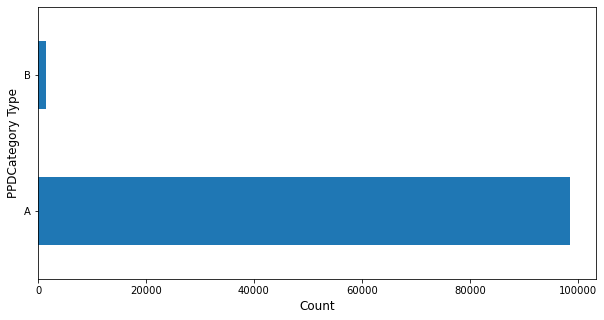

In [45]:
# Visualizing PPDCategory Type
plt.figure(figsize=(10,5))
ax = df_s["PPDCategory Type"].value_counts().plot.barh()
ax.set_xlabel("Count", fontsize = 12)
ax.set_ylabel("PPDCategory Type", fontsize = 12)
plt.show();

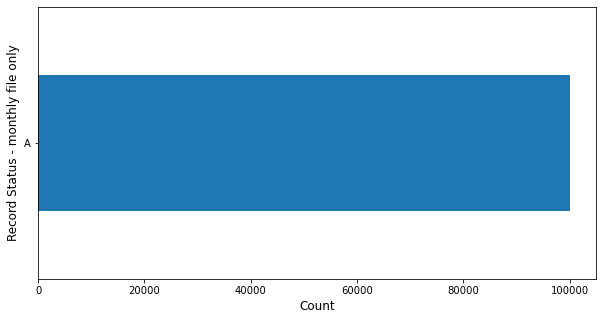

In [46]:
# Visualizing Record Status - monthly file only
plt.figure(figsize=(10,5))
ax = df_s["Record Status - monthly file only"].value_counts().plot.barh()
ax.set_xlabel("Count", fontsize = 12)
ax.set_ylabel("Record Status - monthly file only", fontsize = 12)
plt.show();

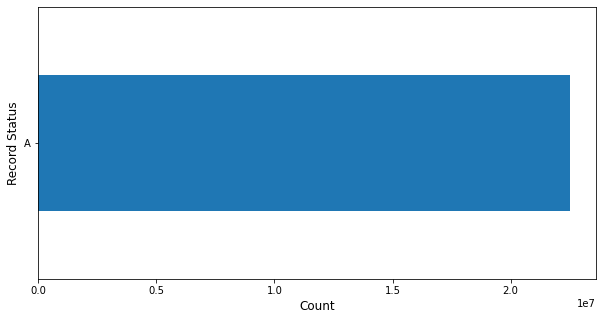

In [47]:
# Visualizing Record Status - monthly file only for entire data set
plt.figure(figsize=(10,5))
ax = df["Record Status - monthly file only"].value_counts().plot.barh()
ax.set_xlabel("Count", fontsize = 12)
ax.set_ylabel("Record Status", fontsize = 12)
plt.show();

<Figure size 720x360 with 0 Axes>

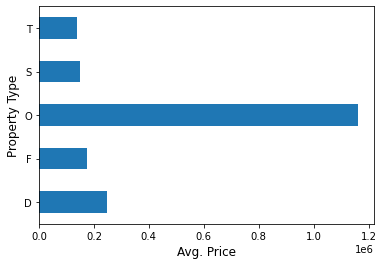

In [48]:
# Aggregating prices based on Property Type
plt.figure(figsize=(10,5))
ax = df_s.groupby("Property Type").agg(["mean"]).plot.barh()
ax.set_xlabel("Avg. Price", fontsize = 12)
ax.set_ylabel("Property Type", fontsize = 12)
ax.get_legend().remove()
plt.show();

<Figure size 720x360 with 0 Axes>

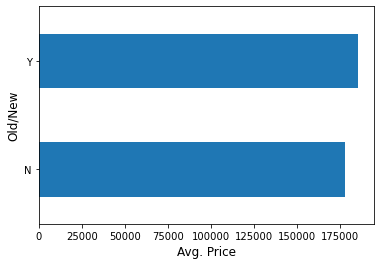

In [49]:
# Aggregating prices based on Old/New
plt.figure(figsize=(10,5))
ax = df_s.groupby("Old/New").agg(["mean"]).plot.barh()
ax.set_xlabel("Avg. Price", fontsize = 12)
ax.set_ylabel("Old/New", fontsize = 12)
ax.get_legend().remove()
plt.show();

<Figure size 720x360 with 0 Axes>

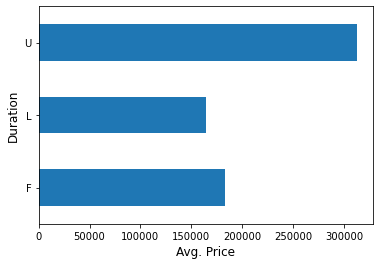

In [50]:
# Aggregating prices based on Duration
plt.figure(figsize=(10,5))
ax = df_s.groupby("Duration").agg(["mean"]).plot.barh()
ax.set_xlabel("Avg. Price", fontsize = 12)
ax.set_ylabel("Duration", fontsize = 12)
ax.get_legend().remove()
plt.show();

In [51]:
# Creating data frame for Town/City based on average price
df_city_p  = pd.DataFrame(df_s.groupby("Town/City").agg(["mean"]))

# Resetting index to make it a column
df_city_p = df_city_p.reset_index()

# Giving Columns a proper name
df_city_p.columns = ["Town/City", "Avg. Price"]

# Sorting the data frame to choose only top 10
df_city_p = df_city_p.sort_values(by = ["Avg. Price"], ascending=False).head(10)
df_city_p.head()

,Town/City,Avg. Price
1034,VIRGINIA WATER,865714.285714
223,CHALFONT ST. GILES,651874.500000
432,HARTFIELD,595000.000000
75,BEACONSFIELD,551636.363636
263,COBHAM,542455.769231


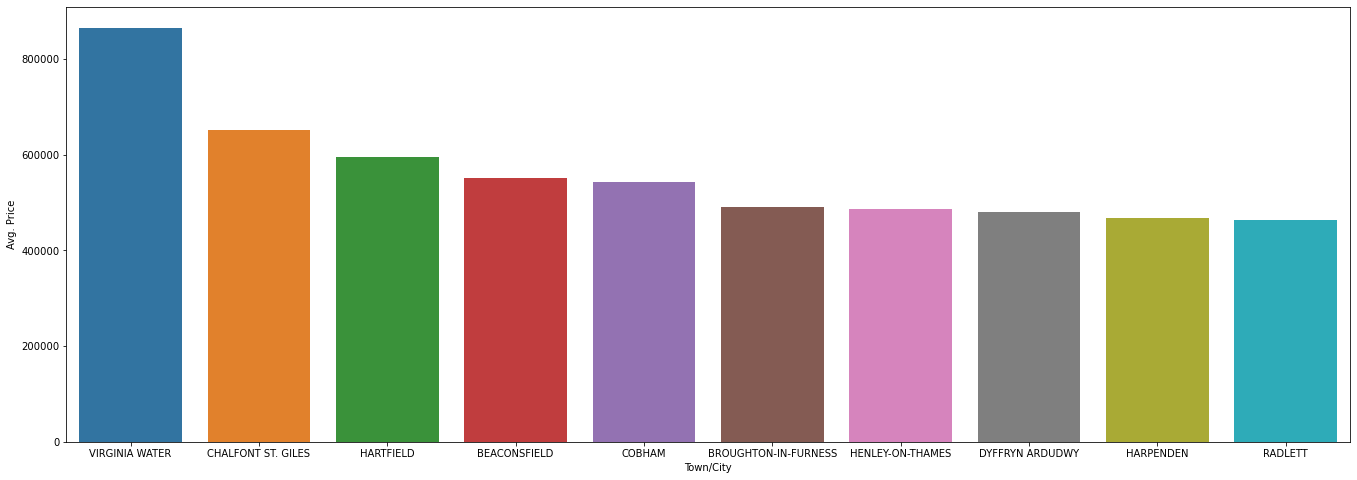

In [52]:
# Plotting the top 10 cities based on the average price
plt.figure(figsize=(23,8))
ax = sns.barplot(data = df_city_p, x = "Town/City", y = "Avg. Price")

In [53]:
# Number of rows associated with VIRGINIA WATER
df_s[df_s["Town/City"] == "VIRGINIA WATER"]

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only,Price_bin
3452269,{B8A92D4B-FA46-43D8-97FF-4119BA3352E0},515000,1998-05-26 00:00,D,N,F,VIRGINIA WATER,RUNNYMEDE,SURREY,A,A,NaN
20662810,{5C2C7DCB-607D-4A65-94C5-E5ACAC3640F3},705000,2015-08-19 00:00,S,N,F,VIRGINIA WATER,RUNNYMEDE,SURREY,A,A,NaN
5552217,{65D4DAA2-B593-4E3C-A555-CF9300070F61},1900000,2000-06-14 00:00,D,N,F,VIRGINIA WATER,RUNNYMEDE,SURREY,A,A,NaN
13756386,{EA40077D-9556-46DA-BEF3-95B7911155F8},3600000,2007-06-26 00:00,D,N,F,VIRGINIA WATER,RUNNYMEDE,SURREY,A,A,NaN
12617894,{D7933EC4-F43E-443E-A0A7-564884659A87},180000,2006-04-03 00:00,F,N,L,VIRGINIA WATER,RUNNYMEDE,SURREY,A,A,200000
17539549,{2DAFECC7-CA5D-4963-9E89-C5D659FE5C23},250000,2011-02-18 00:00,T,N,F,VIRGINIA WATER,RUNNYMEDE,SURREY,A,A,300000
10984637,{2A289E9D-8E06-CDC8-E050-A8C063054829},640000,2004-09-28 00:00,S,N,F,VIRGINIA WATER,RUNNYMEDE,SURREY,A,A,NaN
12834237,{159F920C-9BAE-41C8-9456-4146236B02C7},1400000,2006-11-10 00:00,F,N,F,VIRGINIA WATER,RUNNYMEDE,SURREY,A,A,NaN
12542007,{524A85D0-31AD-485F-A335-3C023556728B},1100000,2006-07-13 00:00,D,N,F,VIRGINIA WATER,RUNNYMEDE,SURREY,A,A,NaN
3134374,{7567A225-D46F-419B-B59D-5A744E1FC3D3},245000,1998-08-14 00:00,F,Y,L,VIRGINIA WATER,RUNNYMEDE,SURREY,A,A,300000


In [54]:
# Creating data frame for Town/City based on average price
df_city_p  = pd.DataFrame(df_s.groupby("Town/City").agg(["mean"]))

# Resetting index to make it a column
df_city_p = df_city_p.reset_index()

# Giving Columns a proper name
df_city_p.columns = ["Town/City", "Avg. Price"]

# Sorting the values
df_city_p = df_city_p.sort_values(by = ["Avg. Price"], ascending=False)

# Resetting index again to get the rank
df_city_p = df_city_p.reset_index()
df_city_p.pop("index")

# Looking at London
df_city_p[df_city_p["Town/City"] == "LONDON"]

,Town/City,Avg. Price
40,LONDON,366204.759063


In [55]:
# Creating data frame for District based on average price
df_district_p  = pd.DataFrame(df_s.groupby("District").agg(["mean"]))

# Resetting index to make it a column
df_district_p = df_district_p.reset_index()

# Giving Columns a proper name
df_district_p.columns = ["District", "Avg. Price"]

# Sorting the values
df_district_p = df_district_p.sort_values(by = ["Avg. Price"], ascending=False)

# Resetting index again to get the rank
df_district_p = df_district_p.reset_index()
df_district_p.pop("index")

# Fetching top 10
df_district_p10 = df_district_p.head(10)
df_district_p10.head()

,District,Avg. Price
0,KENSINGTON AND CHELSEA,1.002340e+06
1,CITY OF WESTMINSTER,7.610538e+05
2,HAMMERSMITH AND FULHAM,4.756775e+05
3,CAMDEN,4.501825e+05
4,RICHMOND UPON THAMES,4.356894e+05


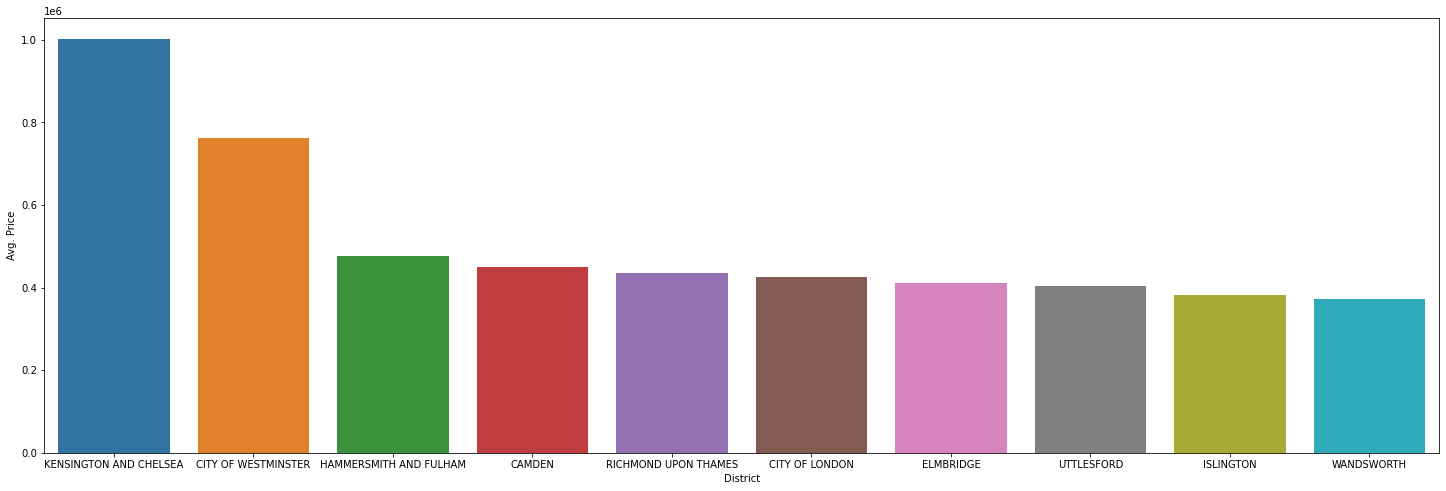

In [56]:
# Plotting the top 10 districts based on the average price
plt.figure(figsize=(25,8))
ax = sns.barplot(data = df_district_p10, x = "District", y = "Avg. Price")

In [57]:
len(df_s[df_s["District"] == "KENSINGTON AND CHELSEA"])

371

In [58]:
# Creating data frame for county based on average price
df_county_p  = pd.DataFrame(df_s.groupby("County").agg(["mean"]))

# Resetting index to make it a column
df_county_p = df_county_p.reset_index()

# Giving Columns a proper name
df_county_p.columns = ["County", "Avg. Price"]

# Sorting the values
df_county_p = df_county_p.sort_values(by = ["Avg. Price"], ascending=False)

# Resetting index again to get the rank
df_county_p = df_county_p.reset_index()
df_county_p.pop("index")

# Fetching top 10
df_county_p10 = df_county_p.head(10)
df_county_p10.head()

,County,Avg. Price
0,WINDSOR AND MAIDENHEAD,320120.126761
1,GREATER LONDON,310207.199985
2,CHESHIRE WEST AND CHESTER,299109.780749
3,SURREY,288747.597907
4,BUCKINGHAMSHIRE,262670.319672


<Figure size 720x360 with 0 Axes>

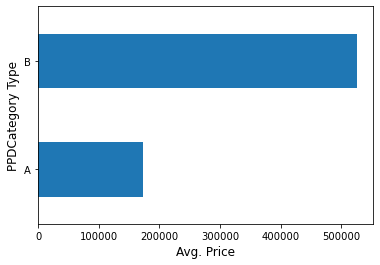

In [59]:
# Aggregating prices based on PPDCategory Type
plt.figure(figsize=(10,5))
ax = df_s.groupby("PPDCategory Type").agg(["mean"]).plot.barh()
ax.set_xlabel("Avg. Price", fontsize = 12)
ax.set_ylabel("PPDCategory Type", fontsize = 12)
ax.get_legend().remove()
plt.show();

In [60]:
df_s.head()

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only,Price_bin
7783052,{05174041-D9C9-4589-8DC8-54391C2B0DE8},114000,2002-04-08 00:00,S,N,F,EXETER,EXETER,DEVON,A,A,200000
6507038,{B0C042EA-A3ED-4D08-9839-238626A54780},76000,2001-04-09 00:00,S,N,L,BOLTON,BOLTON,GREATER MANCHESTER,A,A,100000
13016861,{699EC06C-4140-47A0-89B9-4E638BDB6F64},124950,2006-11-08 00:00,S,N,F,BLACKPOOL,BLACKPOOL,BLACKPOOL,A,A,200000
18584945,{20FC5634-C854-43CC-9A27-88326B9A2F61},73500,2013-10-23 00:00,T,N,F,SOWERBY BRIDGE,CALDERDALE,WEST YORKSHIRE,A,A,100000
12853901,{9D057686-B984-4737-B1AC-1E8B6889A6BD},28500,2006-08-21 00:00,F,Y,L,CHESTERFIELD,CHESTERFIELD,DERBYSHIRE,A,A,100000


In [61]:
# Dropping the columns which are not needed
df_s.drop(["Transaction unique identifier", "Date of Transfer", "Town/City", "District", "County", "Record Status - monthly file only", "Price_bin"],
          axis = 1,
          inplace = True)
df_s.head()

,Price,Property Type,Old/New,Duration,PPDCategory Type
7783052,114000,S,N,F,A
6507038,76000,S,N,L,A
13016861,124950,S,N,F,A
18584945,73500,T,N,F,A
12853901,28500,F,Y,L,A


In [62]:
# Resetting the index
df_s = df_s.reset_index()
df_s.pop("index")
df_s.head()

,Price,Property Type,Old/New,Duration,PPDCategory Type
0,114000,S,N,F,A
1,76000,S,N,L,A
2,124950,S,N,F,A
3,73500,T,N,F,A
4,28500,F,Y,L,A


In [63]:
# Converting "Old/New" to numerical
df_s["Old/New"] = df_s["Old/New"].map(lambda x: 1 if x == "Y" else 0)
df_s.head()

,Price,Property Type,Old/New,Duration,PPDCategory Type
0,114000,S,0,F,A
1,76000,S,0,L,A
2,124950,S,0,F,A
3,73500,T,0,F,A
4,28500,F,1,L,A


In [64]:
# Converting "PPDCategory Type" to numerical
df_s["PPDCategory Type"] = df_s["PPDCategory Type"].map(lambda x: 1 if x == "B" else 0)
df_s.head()

,Price,Property Type,Old/New,Duration,PPDCategory Type
0,114000,S,0,F,0
1,76000,S,0,L,0
2,124950,S,0,F,0
3,73500,T,0,F,0
4,28500,F,1,L,0


In [65]:
# Creating dummies for "Property Type"
df_PT = pd.get_dummies(df_s["Property Type"], drop_first = True)
df_PT.head()

,F,O,S,T
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0


In [66]:
# Creating dummies for "Duration"
df_D = pd.get_dummies(df_s["Duration"], drop_first = True)
df_D.head()

,L,U
0,0,0
1,1,0
2,0,0
3,0,0
4,1,0


In [67]:
# Joining df_s and df_PT
df_s = pd.concat([df_s, df_PT], axis = 1, join = "inner")
df_s.head()

,Price,Property Type,Old/New,Duration,PPDCategory Type,F,O,S,T
0,114000,S,0,F,0,0,0,1,0
1,76000,S,0,L,0,0,0,1,0
2,124950,S,0,F,0,0,0,1,0
3,73500,T,0,F,0,0,0,0,1
4,28500,F,1,L,0,1,0,0,0


In [68]:
# Joining df_s and df_D
df_s = pd.concat([df_s, df_D], axis = 1, join = "inner")
df_s.head()

,Price,Property Type,Old/New,Duration,PPDCategory Type,F,O,S,T,L,U
0,114000,S,0,F,0,0,0,1,0,0,0
1,76000,S,0,L,0,0,0,1,0,1,0
2,124950,S,0,F,0,0,0,1,0,0,0
3,73500,T,0,F,0,0,0,0,1,0,0
4,28500,F,1,L,0,1,0,0,0,1,0


In [69]:
# Dropping the columns which are not needed
df_s.drop(["Property Type", "Duration"], axis = 1, inplace = True)
df_s.head()

,Price,Old/New,PPDCategory Type,F,O,S,T,L,U
0,114000,0,0,0,0,1,0,0,0
1,76000,0,0,0,0,1,0,1,0
2,124950,0,0,0,0,1,0,0,0
3,73500,0,0,0,0,0,1,0,0
4,28500,1,0,1,0,0,0,1,0


In [70]:
# Regularizing Price column by applying log function
df_s["Price"] = np.log(df_s["Price"])
df_s.head()

,Price,Old/New,PPDCategory Type,F,O,S,T,L,U
0,11.643954,0,0,0,0,1,0,0,0
1,11.238489,0,0,0,0,1,0,1,0
2,11.735669,0,0,0,0,1,0,0,0
3,11.205041,0,0,0,0,0,1,0,0
4,10.257659,1,0,1,0,0,0,1,0


C:\Users\pranj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


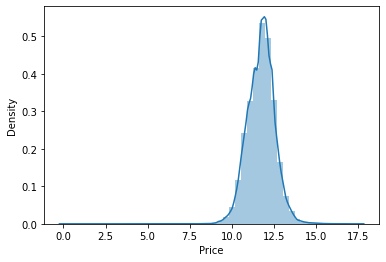

In [71]:
sns.distplot(df_s["Price"]);

In [72]:
# Splitting data into X and y
y = df_s.pop("Price")
X = df_s

In [73]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 108)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80000, 8), (20000, 8), (80000,), (20000,))

In [74]:
# Applying linear regression
from sklearn.linear_model import LinearRegression

# Creating an instance for the model
lr_model = LinearRegression(n_jobs = -1)

In [75]:
# Fitting and scoring the model on train data set

lr_model.fit(X_train, y_train)

lr_model.score(X_train, y_train)

0.11773663365403664

In [76]:
# Checking the error on training data set
y_true = np.exp(y_train)
y_pred = np.exp(lr_model.predict(X_train))

from sklearn.metrics import mean_squared_error
mean_squared_error(y_true, y_pred, squared = False)

315563.39595618553

In [77]:
# Creating variables to store results
train_score = lr_model.score(X_train, y_train)
train_rmse = mean_squared_error(y_true, y_pred, squared = False)

In [78]:
results_train = pd.DataFrame({"R-Squared": [train_score],
                              "Train_RMSE": [train_rmse]})
results_train

,R-Squared,Train_RMSE
0,0.117737,315563.395956


Text(0, 0.5, 'Residuals')

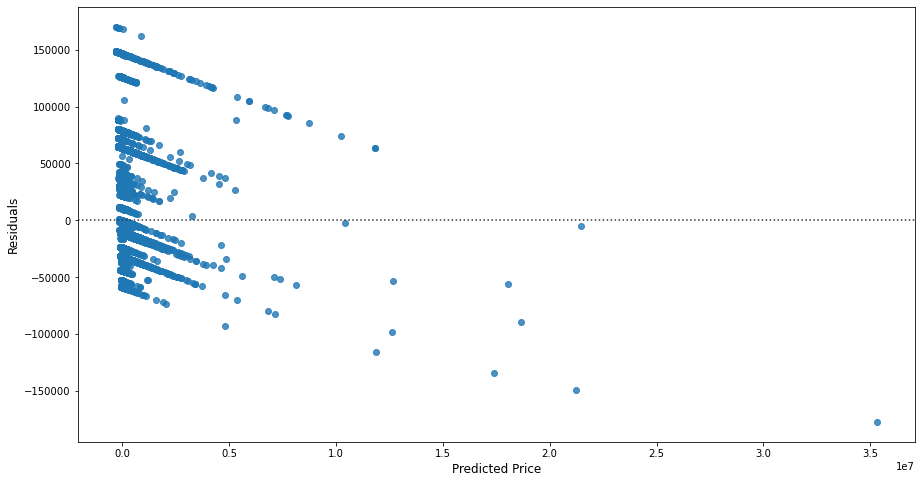

In [79]:
# Creating residual plot
residuals = y_true - y_pred

# Creating plot
plt.figure(figsize=(15,8))
ax = sns.residplot(x = residuals, y = y_pred)
ax.set_xlabel("Predicted Price", fontsize = 12)
ax.set_ylabel("Residuals", fontsize = 12)

In [80]:
# Code for Hopkins Statistics
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [81]:
# Randomly selecting 100 thousand rows as data is too big
df_s = df.sample(n = 100000, random_state = 108)

# Dropping the columns which are not needed
df_s.drop(["Transaction unique identifier", "Date of Transfer", "Town/City", "District", "County", "Record Status - monthly file only"],
          axis = 1,
          inplace = True)

# Resetting the index
df_s = df_s.reset_index()
df_s.pop("index")

# Converting "PPDCategory Type" to numerical
df_s["PPDCategory Type"] = df_s["PPDCategory Type"].map(lambda x: 1 if x == "B" else 0)

# Converting "Old/New" to numerical
df_s["Old/New"] = df_s["Old/New"].map(lambda x: 1 if x == "Y" else 0)

# Creating dummies for "Duration"
df_D = pd.get_dummies(df_s["Duration"], drop_first = True)

# Joining df_s and df_D
df_s = pd.concat([df_s, df_D], axis = 1, join = "inner")

# Dropping the columns which are not needed
df_s.drop(["Property Type", "Duration"], axis = 1, inplace = True)

# Regularizing Price column by applying log function
df_s["Price"] = np.log(df_s["Price"])
df_s.head()

,Price,Old/New,PPDCategory Type,L,U
0,11.643954,0,0,0,0
1,11.238489,0,0,1,0
2,11.735669,0,0,0,0
3,11.205041,0,0,0,0
4,10.257659,1,0,1,0


In [82]:
hopkins_stat = []
for i in range(0,5):
    h = hopkins(df_s)
    hopkins_stat.append(h)

np.mean(hopkins_stat)

0.9997132446940814

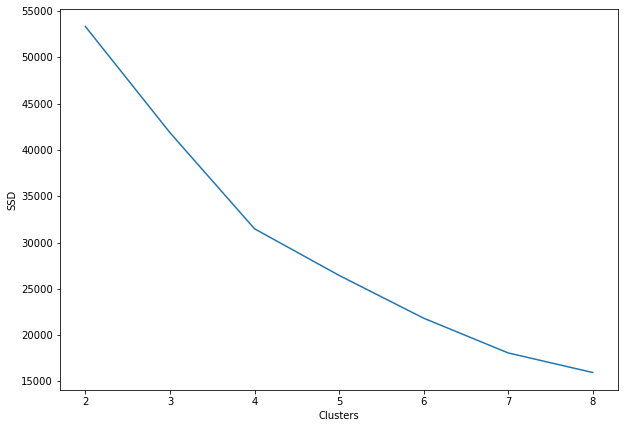

In [83]:
# Applying K-Means
from sklearn.cluster import KMeans

# Elbow Curve
ssd = []
n_clusters = [2,3,4,5,6,7,8]

for i in n_clusters:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_s)
    
    ssd.append(kmeans.inertia_)
    
# Plotting elbow plot
plt.figure(figsize=(10,7))
plt.plot(n_clusters, ssd)
plt.xlabel("Clusters")
plt.ylabel("SSD");